# Módulo 10 tarefa 2

### <span style="color:green">Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

###  <span style="color:blue"> 1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [8]:
# Carregando as bibliotecas relevantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Carregando e lendo o arquivo
filepath = 'https://raw.githubusercontent.com/dsvitorchaves/EBAC/refs/heads/main/previsao_de_renda.csv'
df_original = pd.read_csv(filepath)

df_novo = df_original.drop(columns='Unnamed: 0').set_index(keys='index', drop=True)

df_novo.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,,,,,,,,,,,,,,
8682,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
12830,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2885,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
16168,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
12438,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [58]:
resultado = df_novo.groupby(['posse_de_veiculo', 'posse_de_imovel'])['renda'].mean().reset_index()

resultado

,posse_de_veiculo,posse_de_imovel,renda
0,False,False,4135.868139
1,False,True,4511.636668
2,True,False,4865.181090
3,True,True,5057.200615


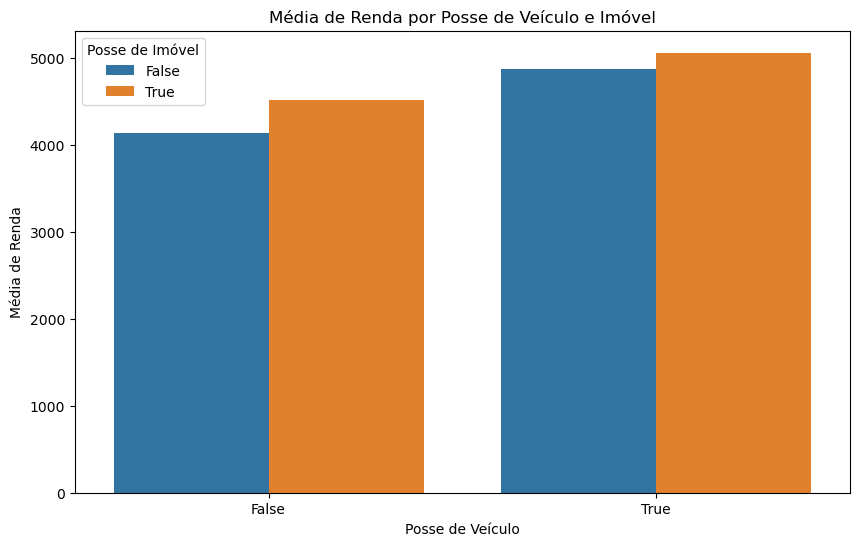

In [60]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=resultado, x='posse_de_veiculo', y='renda', hue='posse_de_imovel')

# Configurações adicionais
plt.title("Média de Renda por Posse de Veículo e Imóvel")
plt.ylabel("Média de Renda")
plt.xlabel("Posse de Veículo")
plt.legend(title="Posse de Imóvel")
plt.show()

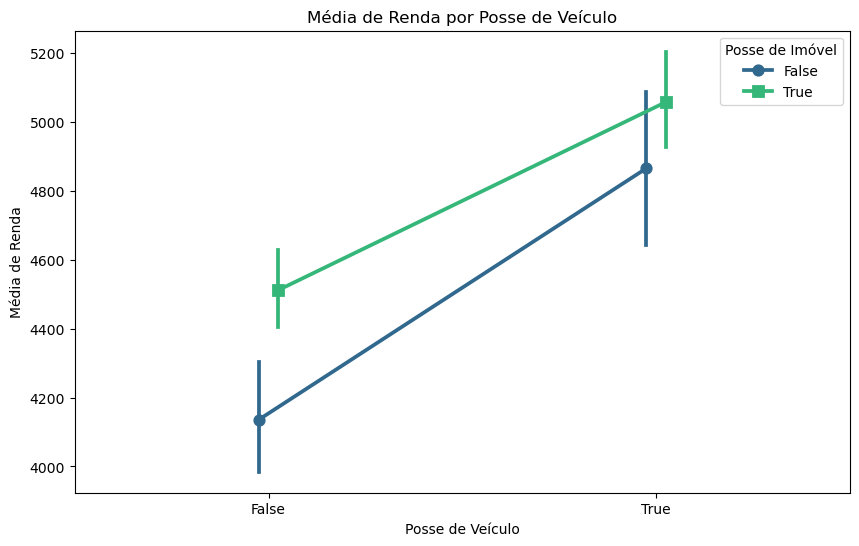

In [84]:
# Configura o gráfico de pontos usando o pointplot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df_novo, x='posse_de_veiculo', y='renda', hue='posse_de_imovel', 
              dodge=True, markers=["o", "s"], errorbar=('ci', 95),  palette="viridis")

# Configurações adicionais
plt.title("Média de Renda por Posse de Veículo")
plt.ylabel("Média de Renda")
plt.xlabel("Posse de Veículo")
plt.legend(title="Posse de Imóvel")
plt.show()

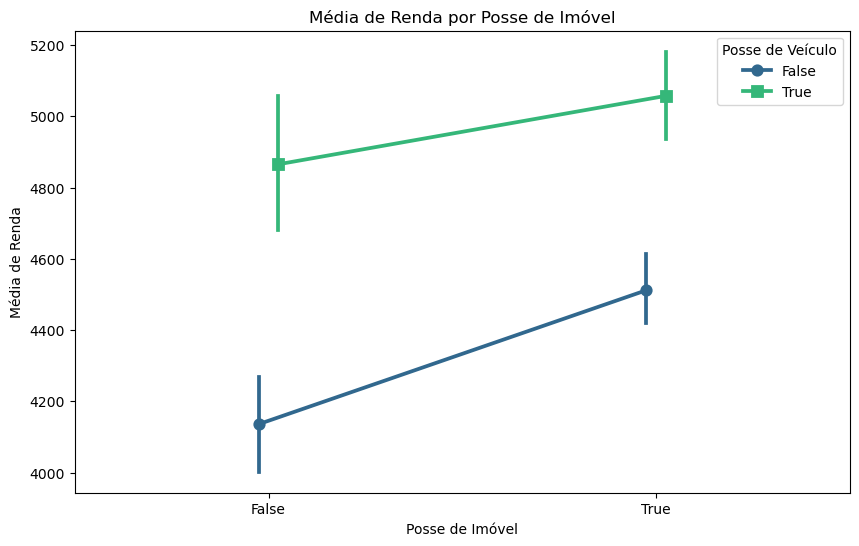

In [82]:
plt.figure(figsize=(10, 6))
sns.pointplot(x="posse_de_imovel", y="renda", hue = 'posse_de_veiculo',
                   data=df_novo, markers=["o", "s"], dodge=True, errorbar=('ci', 90), palette="viridis")
# Configurações adicionais
plt.title("Média de Renda por Posse de Imóvel")
plt.ylabel("Média de Renda")
plt.xlabel("Posse de Imóvel")
plt.legend(title="Posse de Veículo")
plt.show()

## <span style="color:red"> Insights: 
### <span style="color: blue"> Conforme mostrado nos gráficos acima, quando a propriedade de veículo e propriedade são ambas verdadeiras, a renda média é muito maior.Poortanto, podemos notar uma relevância significativa ao comparar a renda média com a propriedade de um veículo e propriedade.